In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('ford1.csv', sep=',')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,4,2017,12000.0,0,15944.0,2,150,57.7,1.0
1,5,2015,7830.0,1,50124.0,0,0,74.3,1.5
2,4,2016,10798.0,1,11843.0,2,0,65.7,1.0
3,5,2019,15495.0,1,5600.0,2,145,60.1,1.0
4,0,2013,5698.0,1,44901.0,2,145,47.1,1.4
...,...,...,...,...,...,...,...,...,...
372,2,2017,9298.0,1,16770.0,2,145,44.8,1.5
373,0,2014,7498.0,2,33023.0,2,160,44.1,1.6
374,4,2019,14698.0,1,8725.0,2,145,58.9,1.0
375,5,2017,11995.0,1,23469.0,2,125,51.4,1.5


In [3]:
X = df.iloc[:, [True,True,False,True,True,True,True,True,True]]
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X

,model,year,type,distance,fuel,tax,miles per galoon,size
0,4,2017,0,15944.0,2,150,57.7,1.0
1,5,2015,1,50124.0,0,0,74.3,1.5
2,4,2016,1,11843.0,2,0,65.7,1.0
3,5,2019,1,5600.0,2,145,60.1,1.0
4,0,2013,1,44901.0,2,145,47.1,1.4
...,...,...,...,...,...,...,...,...
372,2,2017,1,16770.0,2,145,44.8,1.5
373,0,2014,2,33023.0,2,160,44.1,1.6
374,4,2019,1,8725.0,2,145,58.9,1.0
375,5,2017,1,23469.0,2,125,51.4,1.5


In [4]:
f1 = ['year']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

sr.coef_, sr.intercept_

(array([1667.09505857]), -3349867.5844944594)

Линейная регрессия имеет вид Цена = 1667.09505857*Год-3349867.5844944594

In [5]:
y_pred = sr.predict(X_test[f1])
sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.399, 0.351)

In [6]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(3251.67, 3263.96)

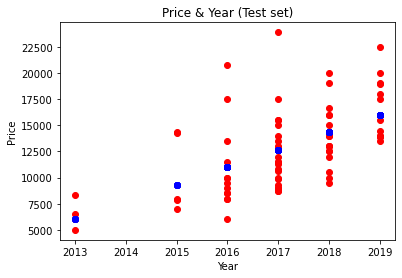

In [7]:
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], sr.predict(X_test[f1]), 'bo')
plt.title('Price & Year (Test set)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

График показал, чем моложе автомобиль, тем выше его цена

In [8]:
mr = LinearRegression().fit(X_train, y_train)
mr.score(X_train, y_train).round(3)

0.76

Коэффициент регрессии = 0.76

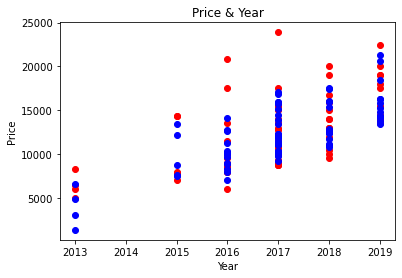

In [9]:
# Visualising the Test set results
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], mr.predict(X_test), 'bo')
plt.title('Price & Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [10]:
# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     115.3
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           9.69e-86
Time:                        01:53:15   Log-Likelihood:                -2723.2
No. Observations:                 301   AIC:                             5464.
Df Residuals:                     292   BIC:                             5498.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.929e+06   2.32e+05    -12.640      0.000   -3.39e+06   -2.47e+06
model              107.4171     43.298      2.481      0.014      22.201     192.633
year              1457.3157    114.716     12.704      0.000    1231.540    1683.091
type              -175.3098    354.915     -0.494      0.622    -873.825     523.206
distance            -0.0690      0.011     -6.005      0.000      -0.092      -0.046
fuel               -21.9925    298.910     -0.074      0.941    -610.284     566.299
tax                 -2.0368      2.837     -0.718      0.473      -7.619       3.546
miles per galoon   -57.6103     22.748     -2.533      0.012    -102.381     -12.839
size              5215.0317    681.448      7.653      0.000    3873.860    6556.203
==============================================================================
Omnibus:                       28.283   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.693
Skew:                          -0.454   Prob(JB):                     5.43e-15
Kurtosis:                       5.101   Cond. No.                     4.85e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train_p, y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([-1.00117747e+08, -1.22346316e+05, -7.95978238e+04,  4.84416215e+05,
         6.00681804e+01,  3.56349077e+05, -1.63734988e+04, -7.09577141e+04,
         1.57559700e+06,  1.14669105e+01,  6.21959479e+01,  3.03585800e+02,
         1.96427392e-04, -3.09400063e+02, -2.98400859e+00, -3.28719233e+01,
        -6.75900200e+02,  1.97794227e+01, -2.36516122e+02, -2.99469958e-02,
        -1.65809550e+02,  8.14521473e+00,  3.61775335e+01, -7.78754600e+02,
         1.00828709e+03, -2.64278437e-02, -1.05112055e+03, -1.64103979e+00,
        -7.56884918e+01, -4.29488909e+03, -1.82312215e-06,  3.22251027e-02,
         1.42946034e-04,  3.71503721e-03,  8.29121343e-02, -2.90683274e+03,
         2.62938316e+00, -2.09963687e+02, -2.45902590e+03, -1.59046600e-01,
        -7.11248073e-01,  2.11030319e+01, -7.08555684e+00, -5.20524178e+02,
         1.12282353e+04]),
 180128382.0997998)

In [12]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p)

# Coefficient of determination R^2
pr.score(X_train_p, y_train).round(3)

0.825

R^2 лучше для множественной линейной регресси.

In [13]:
# Mean squared error
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(1755.73, 1853.29)

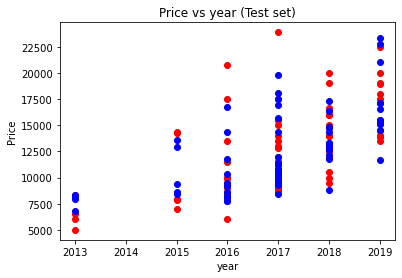

In [14]:
# Visualising the Test set results
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], pr.predict(X_test_p), 'bo')
plt.title('Price vs year (Test set)')
plt.xlabel('year')
plt.ylabel('Price')
plt.show()


In [15]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('ford2.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()